# Лабораторна робота No5
## Робота з бібліотекою OpenCV

## Завдання 1:
### N = ord(X) % 5 + 1, 
### де X – перша велика літера вашого імені в латинській транскрипції. Наприклад, для James Bond номер варіанта буде N = 5

In [1]:
N = ord('D') % 5 + 1
N

4

## Завдання 2:
### Завантажити дані з файлу kr1.xlsx до датафрейму.

In [4]:
import cv2
import pandas as pd
from PIL import Image, ImageDraw

df = pd.read_excel('C:/Users/Dmytro/Python/Lab5/lab6.xlsx')
df.head()

,N,file name,image size,glasses color,line width
0,1,emma-watson2.jpg,300x300,red,2
1,2,emma-watson.jpg,400x400,blue,3
2,3,draco.jpg,700x700,cian,4
3,4,longbottom.jpg,600x600,magenta,5
4,5,ron_wesley.jpg,500x500,yellow,6


## Завдання 3:
### Отримати дані до свого варіанту програмно з датафрейму, використовуючи інструменти індексування.

In [5]:
my_data = df.iloc[N - 1]
my_data

N                             4
file name        longbottom.jpg
image size              600x600
glasses color           magenta
line width                    5
Name: 3, dtype: object

## Завдання 4:
### Створити функцію, що приймає в якості аргументів дані з датафрейму та повертає зменшене зображення з доданими «круглими окулярами» та зберігає отримане зображення у файл.

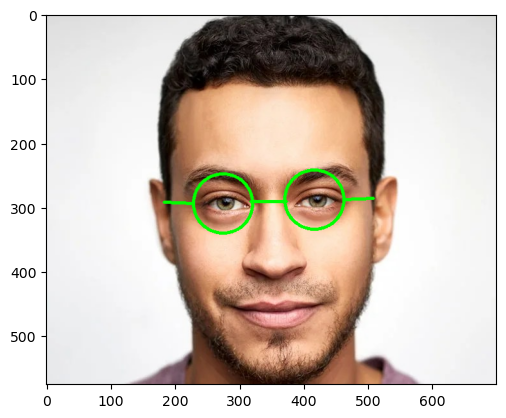

In [14]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb


def add_glasses(image_path, glasses_color, line_width):
    image = cv2.imread(image_path)

    if image is None:
        print("Unable to load the image. Please make sure the file exists.")
        return

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        print("No faces detected in the image.")
        return

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = image[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) < 2:
            print("Not enough eyes detected.")
            continue

        eye_centers = []

        for (ex, ey, ew, eh) in eyes:
            eye_center = (x + ex + ew // 2, y + ey + eh // 2)
            eye_centers.append(eye_center)

            glasses_radius = min(ew, eh) // 2
            glasses_color_rgb = to_rgb(glasses_color)
            glasses_color_bgr = tuple(int(color * 255) for color in glasses_color_rgb[::-1])
            cv2.circle(image, eye_center, glasses_radius, glasses_color_bgr, line_width)

        if len(eye_centers) >= 2:
            stick_width = line_width

            eye1_center, eye2_center = eye_centers
            stick_center = ((eye1_center[0] + eye2_center[0]) // 2, (eye1_center[1] + eye2_center[1]) // 2)

            stick_length = min(abs(eye1_center[0] - eye2_center[0]) // 5, glasses_radius)
            left_point = (stick_center[0] + stick_length, stick_center[1])
            right_point = (stick_center[0] - stick_length, stick_center[1])
            eye1_radius = min(eyes[0][2], eyes[0][3]) // 2
            eye2_radius = min(eyes[1][2], eyes[1][3]) // 2

            eye1_center = (eye1_center[0] + eye1_radius, eye1_center[1])
            eye2_center = (eye2_center[0] - eye2_radius, eye2_center[1])

            cv2.line(image, left_point, right_point, glasses_color_bgr, stick_width)

            add_ear_sticks(image, eye1_center, eye2_center, glasses_radius, glasses_color_bgr, line_width)

    center_x = x + w // 2
    center_y = y + h // 2
    half_size = 350
    start_y = max(0, center_y - half_size)
    end_y = min(image.shape[0], center_y + half_size)
    start_x = max(0, center_x - half_size)
    end_x = min(image.shape[1], center_x + half_size)

    cropped_image = image[start_y:end_y, start_x:end_x]

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite("cropped_image_with_glasses.jpg", cropped_image)


def add_ear_sticks(image, eye1_center, eye2_center, glasses_radius, color, line_width):
    ear_distance = int(abs((eye1_center[0] - eye2_center[0])) * 0.1)  
    ear_height = int(ear_distance * 0.1)  
    ear1 = (min(image.shape[1] - 1, eye1_center[0] + glasses_radius), max(0, eye1_center[1] - ear_height))
    ear2 = (max(0, eye2_center[0] - glasses_radius), max(0, eye2_center[1] - ear_height))

    cv2.line(image, eye1_center, ear1, color, line_width)
    cv2.line(image, eye2_center, ear2, color, line_width)


data = {'N': [4],
        'file name': ['download.jpg'],
        'image size': ['500x500'],
        'glasses color': ['Lime'],
        'line width': [4]}
df = pd.DataFrame(data)

add_glasses(df['file name'][0], df['glasses color'][0], df['line width'][0])

## Висновок

У процесі виконання лабораторної роботи ми скористалися бібліотекою OpenCV для роботи з зображеннями та їх обробки.
Головним завданням було розробити функцію, яка використовує Haar Cascade для виявлення обличчя та очей на зображенні. Після визначення координат очей, функція додавала "круглі окуляри" до зображення та зберігала його у файл. Для малювання на зображенні ми використали бібліотеки PIL та OpenCV.
Важливим було врахувати, що при зменшенні зображення, обличчя мали бути розташовані в центрі картинки, що додавало естетичний аспект обробці.
Отже, у цьому дослідженні ми успішно використали інструменти OpenCV для обробки зображень та створили функцію, яка застосовує "круглі окуляри" до обличчя на зображенні, враховуючи всі зазначені в умові вимоги.
